# CONSTRUCTION OF SVI EQUITY VOL SURFACE

In this notebook I show how you can calibrate to the FX Vol Surface to ATM, 25D MS and 25D RR at one expiry date and analyse different volatility interpolation methods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.market.curves.discount_curve_flat import DiscountCurveFlat
from financepy.market.volatility.equity_vol_surface import EquityVolSurface
from financepy.utils.date import Date
from financepy.models.volatility_fns import VolFuncTypes

# Load the Volatility Market Quotes

In [3]:
value_dt = Date(11, 1, 2021)

In [4]:
stock_price = 3800.0 # Check

In [5]:
expiry_dts = [Date(11, 2, 2021), Date(11, 3, 2021), Date(11, 4, 2021),
               Date(11, 7, 2021), Date(11,10, 2021), Date(11, 1, 2022),
               Date(11, 1, 2023)]

In [6]:
strikes = np.array([3037, 3418, 3608, 3703, 3798, 3893, 3988, 4178, 4557], dtype=float)

Now we pass in the volatility grid

In [7]:
vol_surface = [[42.94, 31.30, 25.88, 22.94, 19.72, 16.90, 15.31, 17.54, 25.67],
             [37.01, 28.25, 24.19, 21.93, 19.57, 17.45, 15.89, 15.34, 21.15],
             [34.68, 27.38, 23.82, 21.85, 19.83, 17.98, 16.52, 15.31, 18.94],
             [31.41, 26.25, 23.51, 22.05, 20.61, 19.25, 18.03, 16.01, 15.90],
             [29.91, 25.58, 23.21, 22.01, 20.83, 19.70, 18.62, 16.63, 14.94],
             [29.26, 25.24, 23.03, 21.91, 20.81, 19.73, 18.69, 16.76, 14.63],
             [27.59, 24.33, 22.72, 21.93, 21.17, 20.43, 19.71, 18.36, 16.26]]

In [8]:
vol_surface = np.array(vol_surface)
vol_surface = vol_surface / 100.0

In [9]:
rfrRate = 0.020  # USD
discount_curve = DiscountCurveFlat(value_dt, rfrRate)

divRate = 0.010  # USD
dividend_curve = DiscountCurveFlat(value_dt, divRate)

# Calibrate Volatility Surface 

In [10]:
vol_function_type = VolFuncTypes.SVI

In [11]:
equitySurface = EquityVolSurface(value_dt,
                                    stock_price,
                                    discount_curve,
                                    dividend_curve,
                                    expiry_dts,
                                    strikes,
                                    vol_surface,
                                    vol_function_type)

In [12]:
tol = 1e-4
equitySurface.check_calibration(False)

11-FEB-2021     3037.000 42.6899 42.9400 -0.25010
11-FEB-2021     3418.000 31.8263 31.3000 0.52626
11-FEB-2021     3608.000 25.8042 25.8800 -0.07581
11-FEB-2021     3703.000 22.6670 22.9400 -0.27299
11-FEB-2021     3798.000 19.6028 19.7200 -0.11725
11-FEB-2021     3893.000 16.9965 16.9000 0.09647
11-FEB-2021     3988.000 15.5441 15.3100 0.23412
11-FEB-2021     4178.000 17.2519 17.5400 -0.28807
11-FEB-2021     4557.000 25.8307 25.6700 0.16065
11-MAR-2021     3037.000 36.9131 37.0100 -0.09689
11-MAR-2021     3418.000 28.5404 28.2500 0.29044
11-MAR-2021     3608.000 24.0725 24.1900 -0.11749
11-MAR-2021     3703.000 21.7940 21.9300 -0.13598
11-MAR-2021     3798.000 19.5589 19.5700 -0.01106
11-MAR-2021     3893.000 17.5116 17.4500 0.06158
11-MAR-2021     3988.000 15.9188 15.8900 0.02879
11-MAR-2021     4178.000 15.3190 15.3400 -0.02101
11-MAR-2021     4557.000 21.1538 21.1500 0.00382
11-APR-2021     3037.000 34.6431 34.6800 -0.03689
11-APR-2021     3418.000 27.5136 27.3800 0.13359
11-APR-20

## Volatility Curves

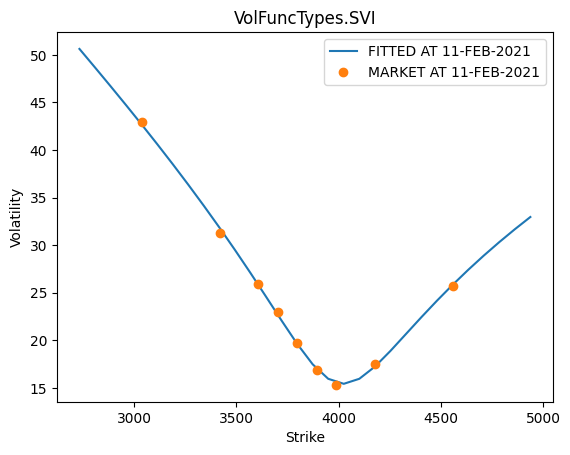

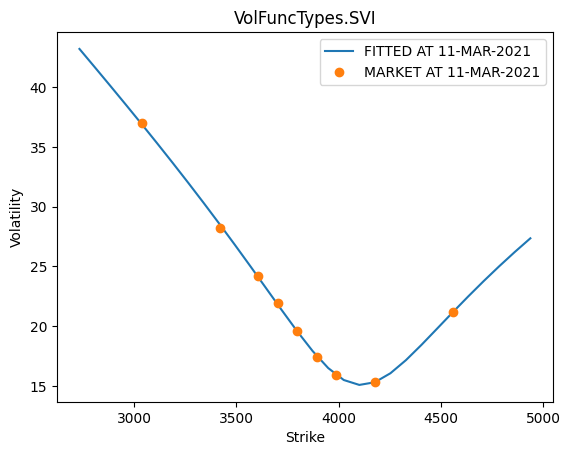

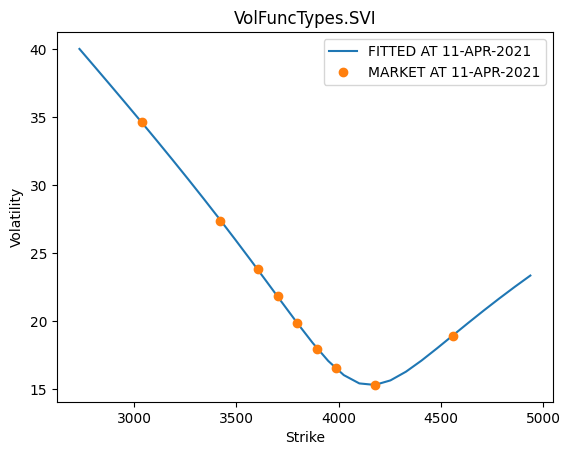

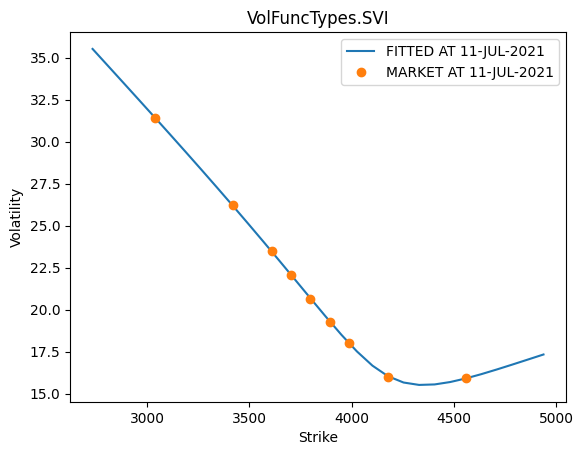

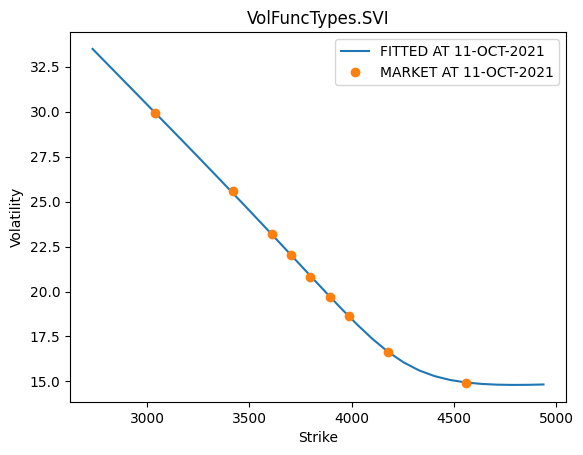

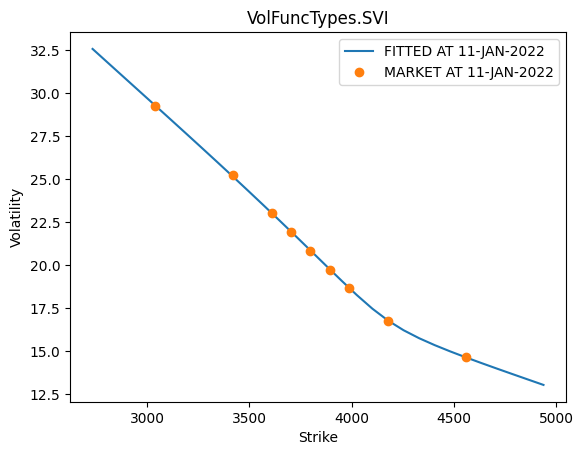

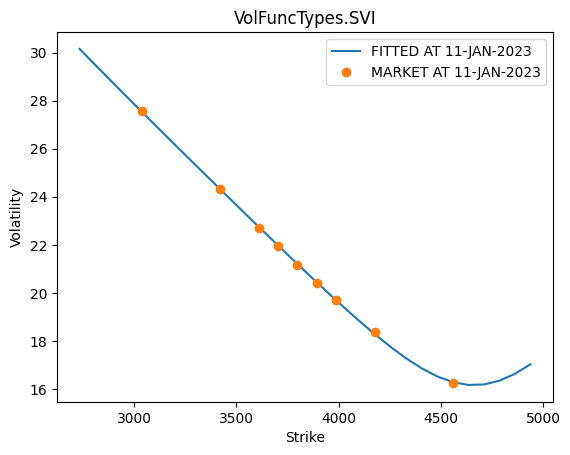

In [13]:
equitySurface.plot_vol_curves()

The fit looks so good, it's almost as if everyone is using the SVI parametrisation ;-)

Copyright (c) 2020, Dominic O'Kane 